# PPMtools: Entrainment analysis

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/user/andrassy/PyPPM')
from ppmpy import ppm
from matplotlib import pyplot as plt
%matplotlib nbagg
from nugridpy import utils
cb = utils.colourblind

In [2]:
yprof_paths = {'D1':'/data/ppm_rpod2/YProfiles/O-shell-M25/D1/', \
               'D2':'/data/ppm_rpod2/YProfiles/O-shell-M25/D2/'}
yprofs = {rid:ppm.yprofile(path) for rid, path in yprof_paths.items()}

rprof_paths = {'M8':'/user/niagara_projects/PPM2.0/M_H-core-M25/M8-Hcore25-768-1000x/prfs/', \
               'M12':'/user/niagara_projects/PPM2.0/M_H-core-M25/M12-Hcore25-1536-1000x/prfs/'}
rp_sets = {rid:ppm.RprofSet(path) for rid, path in rprof_paths.items()}

run_data = {**yprofs, **rp_sets}

Reading attributes from file  YProfile-01-0163.bobaaa
There are 164 YProfile files in the /data/ppm_rpod2/YProfiles/O-shell-M25/D2/ directory.
Ndump values range from 0 to 163
Time values range from 0.0 to 1640.0
Reading attributes from file  YProfile-01-0348.bobaaa
There are 349 YProfile files in the /data/ppm_rpod2/YProfiles/O-shell-M25/D1/ directory.
Ndump values range from 0 to 348
Time values range from 0.0 to 3480.0
492 rprof files found in '/user/niagara_projects/PPM2.0/M_H-core-M25/M12-Hcore25-1536-1000x/prfs/.
Dump numbers range from 0 to 491.
Reading history file '/user/niagara_projects/PPM2.0/M_H-core-M25/M12-Hcore25-1536-1000x/prfs/Hcore001536-0000.hstry'.
622 rprof files found in '/user/niagara_projects/PPM2.0/M_H-core-M25/M8-Hcore25-768-1000x/prfs/.
Dump numbers range from 0 to 621.
Reading history file '/user/niagara_projects/PPM2.0/M_H-core-M25/M8-Hcore25-768-1000x/prfs/Hcore000768-0000.hstry'.


## boundary_radius()

This method can find the boundary radius as defined by a local minimum or maximum in the gradient of a variable or by searching for a certain value of a variable (e.g. FV = 0.5). The method can also return the scale height of that variable at the boundary, which entrainment_rate() makes use of.

/user/andrassy/PyPPM/ppmpy/ppm.py:780: RuntimeWarning: invalid value encountered in true_divide
  Hv_prof = -v/dvdr


<IPython.core.display.Javascript object>


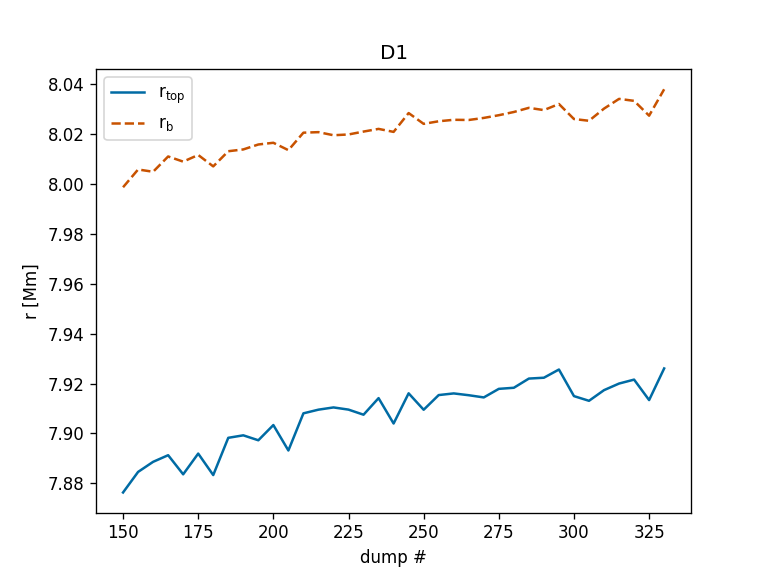

In [3]:
rid = 'D1'
dumps = range(150, 332, 5)
r_min = 7.5
r_max = 8.5
var = 'ut'
criterion = 'min_grad'
rb, H = run_data[rid].boundary_radius(dumps, r_min, r_max, var=var, \
                                      criterion=criterion, 
                                      return_var_scale_height=True)
offset = -1.
rt = rb + offset*np.abs(H)
ifig=1; plt.close(ifig); plt.figure(ifig)
plt.plot(dumps, rt, '-', color=cb(5), label=r'r$_\mathrm{top}$')
plt.plot(dumps, rb, '--', color=cb(8), label=r'r$_\mathrm{b}$')
plt.legend(loc=0)
plt.xlabel('dump #')
plt.ylabel('r [Mm]')
plt.title(rid)

/user/andrassy/PyPPM/ppmpy/ppm.py:780: RuntimeWarning: divide by zero encountered in true_divide
  Hv_prof = -v/dvdr


<IPython.core.display.Javascript object>


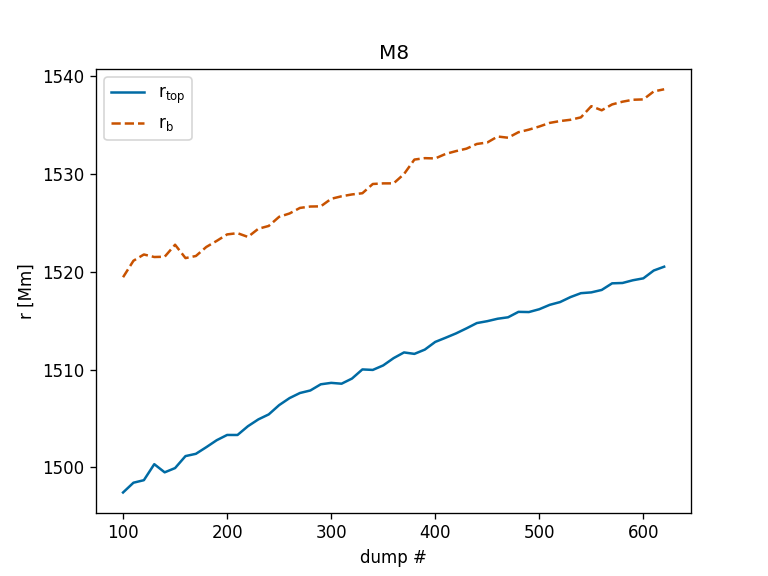

In [4]:
rid = 'M8'
dumps = range(100, 622, 10)
r_min = 1450.
r_max = 1600.
var = 'FV'
criterion = 'max_grad'
rb, H = run_data[rid].boundary_radius(dumps, r_min, r_max, var=var, \
                                      criterion=criterion, 
                                      return_var_scale_height=True)
offset = -1.
rt = rb + offset*np.abs(H)
ifig=2; plt.close(ifig); plt.figure(ifig)
plt.plot(dumps, rt, '-', color=cb(5), label=r'r$_\mathrm{top}$')
plt.plot(dumps, rb, '--', color=cb(8), label=r'r$_\mathrm{b}$')
plt.legend(loc=0)
plt.xlabel('dump #')
plt.ylabel('r [Mm]')
plt.title(rid)

## entrainment_rate()

/user/andrassy/PyPPM/ppmpy/ppm.py:780: RuntimeWarning: invalid value encountered in true_divide
  Hv_prof = -v/dvdr
/user/andrassy/PyPPM/ppmpy/ppm.py:780: RuntimeWarning: divide by zero encountered in true_divide
  Hv_prof = -v/dvdr


<IPython.core.display.Javascript object>


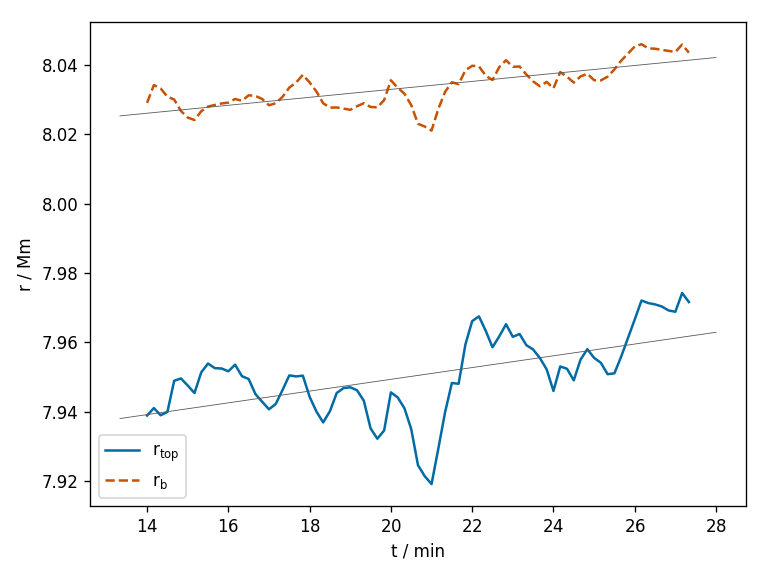

rb is the radius of the convective boundary.
drb/dt = 1.91e-02 km/s

rt is the upper limit for mass integration.
drt/dt = 2.83e-02 km/s


<IPython.core.display.Javascript object>


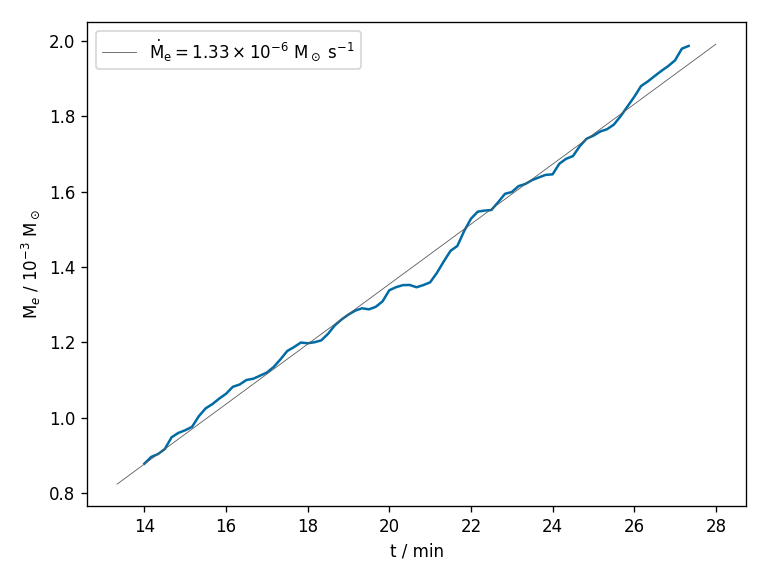

Resolution: 1536^3
mir_fc =  [  1.32618507e-06  -2.36845356e-04]
Entrainment rate: 1.326e-06 M_Sun/s


In [5]:
rid = 'D2'
dumps = range(84, 164, 1)
r_min = 7.5
r_max = 8.5
var = 'ut'
criterion = 'min_grad'
offset = -1.
_ = run_data[rid].entrainment_rate(dumps, r_min, r_max, var=var, \
                                   criterion=criterion, \
                                   offset=offset, ifig0=3)

/user/andrassy/PyPPM/ppmpy/ppm.py:780: RuntimeWarning: divide by zero encountered in true_divide
  Hv_prof = -v/dvdr
/user/andrassy/PyPPM/ppmpy/ppm.py:780: RuntimeWarning: invalid value encountered in true_divide
  Hv_prof = -v/dvdr


<IPython.core.display.Javascript object>


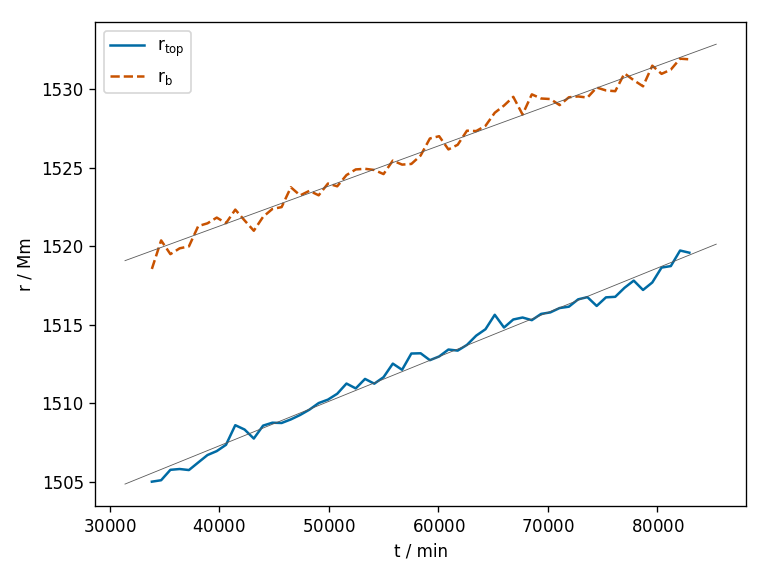

rb is the radius of the convective boundary.
drb/dt = 4.26e-03 km/s

rt is the upper limit for mass integration.
drt/dt = 4.72e-03 km/s


<IPython.core.display.Javascript object>


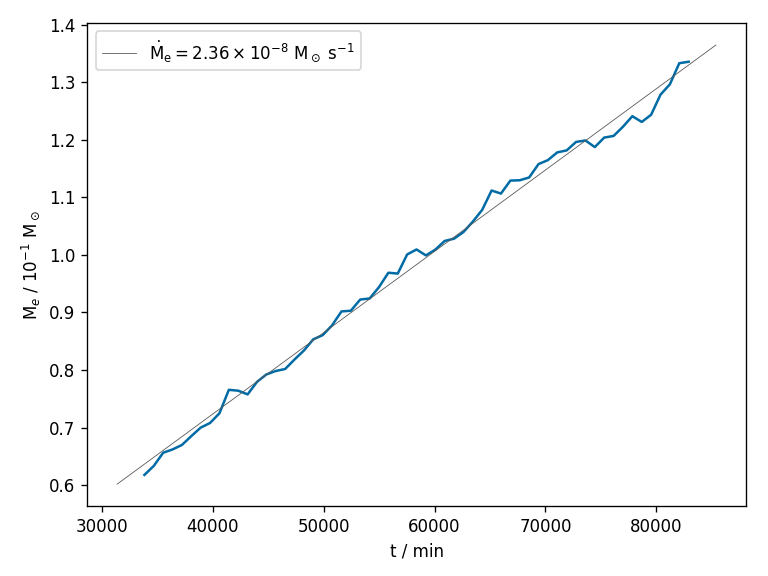

Resolution: 1536^3
mir_fc =  [  2.35590508e-08   1.58025313e-02]
Entrainment rate: 2.356e-08 M_Sun/s


In [6]:
rid = 'M12'
dumps = range(200, 492, 5)
r_min = 1450.
r_max = 1600.
var = 'FV'
criterion = 'max_grad'
offset = -1.
_ = run_data[rid].entrainment_rate(dumps, r_min, r_max, var=var, \
                                   criterion=criterion, \
                                   offset=offset, ifig0=5)